In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
import pyfoal

In [3]:
gpu = 7
device = torch.device('cpu' if gpu is None else f'cuda:{gpu}')
loader = pyfoal.data.loader(['arctic'], 'test', gpu)
checkpoint = '/data/max/pyfoal/runs/radtts/00250000.pt'

In [4]:
for phonemes, audio, priors, mask, phoneme_lengths, frame_lengths, stems, alignments, texts in loader:
    
    # Infer
    logits = pyfoal.infer(
        phonemes.to(device),
        audio.to(device),
        checkpoint)
    
    break

RuntimeError: Error(s) in loading state_dict for Model:
	Missing key(s) in state_dict: "key_encoder.embedding.weight", "key_encoder.input_stack.0.weight", "key_encoder.input_stack.0.bias", "key_encoder.input_stack.2.weight", "key_encoder.input_stack.2.bias", "key_encoder.input_stack.4.weight", "key_encoder.input_stack.4.bias", "key_encoder.output_stack.0.weight", "key_encoder.output_stack.0.bias", "key_encoder.output_stack.2.weight", "key_encoder.output_stack.2.bias". 
	Unexpected key(s) in state_dict: "embedding.weight", "key_encoder.0.weight", "key_encoder.0.bias", "key_encoder.2.weight", "key_encoder.2.bias", "key_encoder.4.weight", "key_encoder.4.bias", "key_encoder.6.weight", "key_encoder.6.bias", "key_encoder.8.weight", "key_encoder.8.bias". 

In [ ]:
display = logits.clone()
display[display < -60.] = -60.
figure = pyfoal.plot.logits(display[0].cpu())

In [ ]:
pyfoal.plot.logits(

In [65]:
alignment = pyfoal.postprocess(phonemes[0], logits[0])
target = alignments[0]

In [66]:
def alignment_to_indices(x, align):
    hopsize = pyfoal.HOPSIZE / pyfoal.SAMPLE_RATE
    times = hopsize / 2 + torch.arange(len(x)) * hopsize
    phonemes = pyfoal.convert.alignment_to_indices(
        align,
        hopsize,
        times=times)
    _, indices = torch.unique_consecutive(
        torch.tensor(phonemes),
        return_inverse=True)
    return indices
align_indices = alignment_to_indices(logits[0], alignment)
target_indices = alignment_to_indices(logits[0], target)

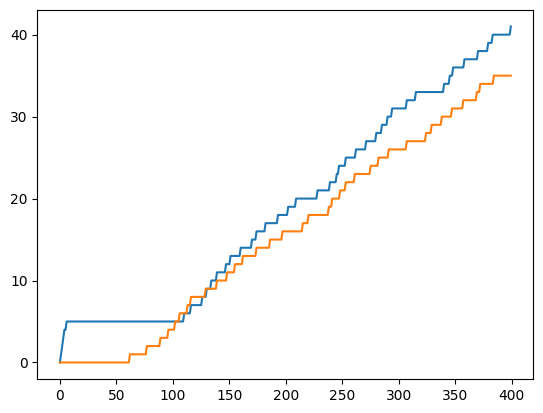

In [67]:
plt.plot(align_indices)
plt.plot(target_indices)

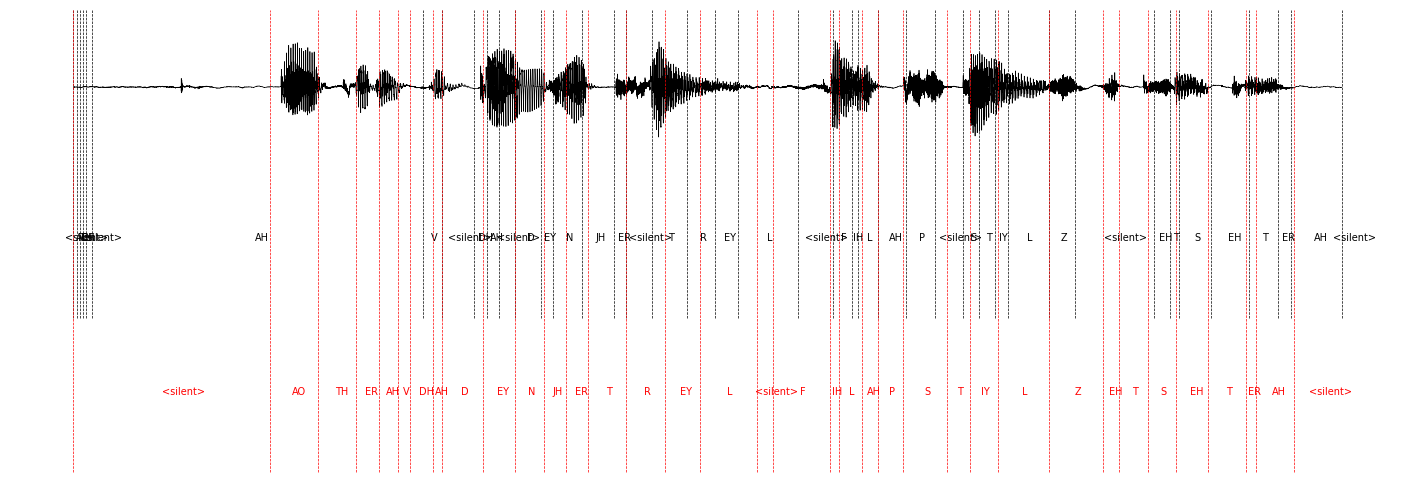

In [ ]:
pyfoal.plot.alignment(audio, alignment, target).show()

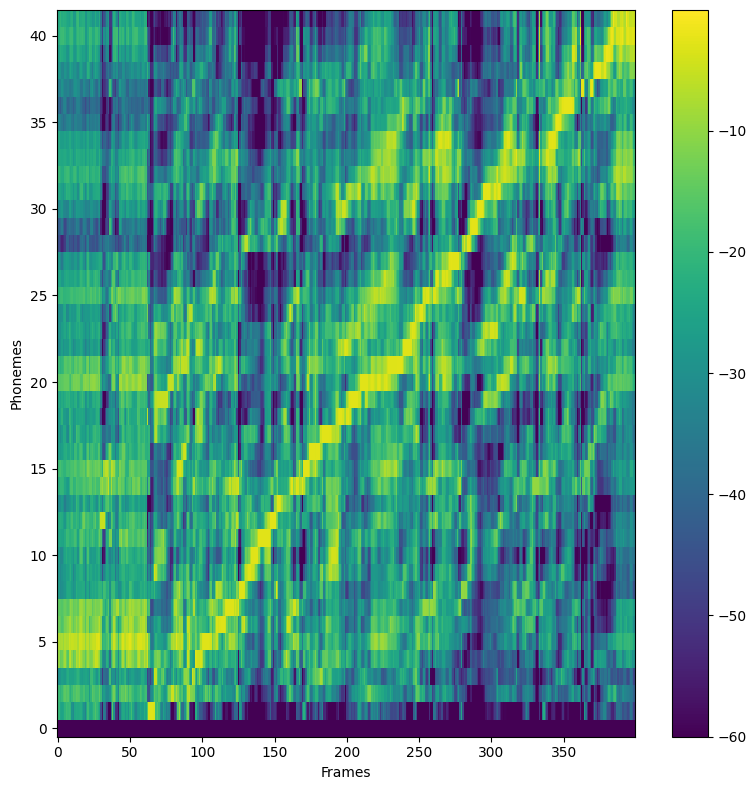

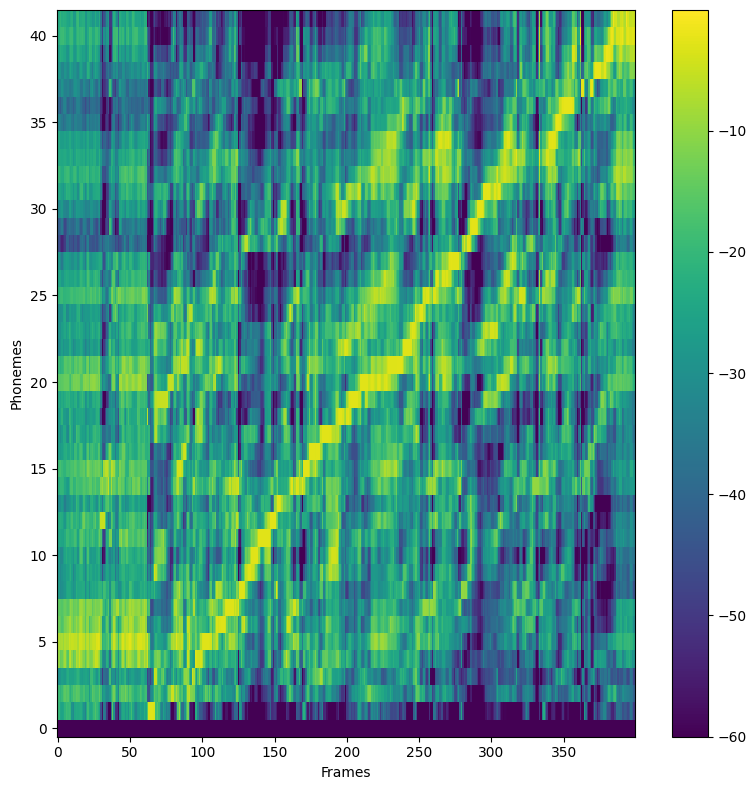

In [24]:
logits[logits < -60.] = -60.
pyfoal.plot.logits(logits[0].cpu())